In [1]:
import os.path
import os
import math as m
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
def gen_lattice(S0, u, d, N):
    """generates a binomial lattice
    
    for a given up, down, start value and number of steps (N).
    Resulting lattice has N+1 levels.
    """
    S = [float(S0)]

    for i in range(1, N+1):
        for j in range(0, i+1):
            S.append( S0 * d**j * u**(i-j) )

    return S


In [3]:
gen_lattice(S0=100., N=3, u=1.1, d=1./1.1)

[100.0,
 110.00000000000001,
 90.9090909090909,
 121.00000000000001,
 100.0,
 82.64462809917354,
 133.10000000000005,
 110.00000000000001,
 90.9090909090909,
 75.13148009015777]

The number of levels in a binomial lattice of length N is $\frac{\sqrt{8N+1}-1}{2}$

In [5]:
def lattice_levels(S):
    return int( round( (m.sqrt(8*len(S)+1)-1)/2 ) )

## Код для визуализации решетки

lattice visialisation based on idea from [link](http://www.theresearchkitchen.com/archives/738)

In [5]:
tmp = os.path.join(os.path.expanduser('~'), 'tmp')
if not os.path.exists(tmp):
    os.makedirs(tmp)

In [6]:
def dotlattice(S, filename, labels=True):
    f = open(filename, 'w')
    f.write("digraph G {\n")

    shape = "plaintext" if labels else "point"

    f.write("node[shape=%s, samehead=true, sametail=true];\n" % shape)
    f.write("rankdir=LR;\n")

    f.write("edge[arrowhead=none];\n")

    # Create a dot node for each element in the lattice
    for i in range(0, len(S)):
        f.write( "node%d[label=\"%g\"];\n" % (i+1, S[i]) )

    # The number of levels in a binomial lattice
    L = lattice_levels(S)

    k=1
    for i in range(1, L):
        tabs = "\t" * (i-1)
        j = i
        while( j>0 ):
            f.write("node%d->node%d;\n" % (k, k+i))
            f.write("node%d->node%d;\n" % (k, k+i+1))
            k = k + 1
            j = j - 1

    f.write("}\n")


In [8]:
name="lattice"
dotfile=os.path.join(tmp, name+".dot")
pngfile=os.path.join(tmp, name+".png")
dotlattice(gen_lattice(S0=100., N=5, u=1.1, d=1/1.1), filename=dotfile )
!dot -Tpng -o {pngfile} -v {dotfile} 
#2> /dev/null

dot - graphviz version 2.38.0 (20140413.2041)
Using render: cairo:cairo
Using device: png:cairo:cairo
libdir = "/usr/lib/graphviz"
Activated plugin library: libgvplugin_dot_layout.so.6
Using layout: dot:dot_layout
The plugin configuration file:
	/usr/lib/graphviz/config6a
		was successfully loaded.
    render	:  cairo dot fig gd map pic pov ps svg tk vml vrml xdot
    layout	:  circo dot fdp neato nop nop1 nop2 osage patchwork sfdp twopi
    textlayout	:  textlayout
    device	:  bmp canon cmap cmapx cmapx_np dot eps fig gd gd2 gif gtk gv ico imap imap_np ismap jpe jpeg jpg pdf pic plain plain-ext png pov ps ps2 svg svgz tif tiff tk vml vmlz vrml wbmp x11 xdot xdot1.2 xdot1.4 xlib
    loadimage	:  (lib) bmp eps gd gd2 gif ico jpe jpeg jpg png ps svg xbm
pack info:
  mode   undefined
  size   0
  flags  0
  margin 8
pack info:
  mode   node
  size   0
  flags  0
fontname: "Times-Roman" resolved to: (ps:pango  Nimbus Roman No9 L,  REGULAR) (PangoCairoFcFont) "Nimbus Roman No9 L, Regular"

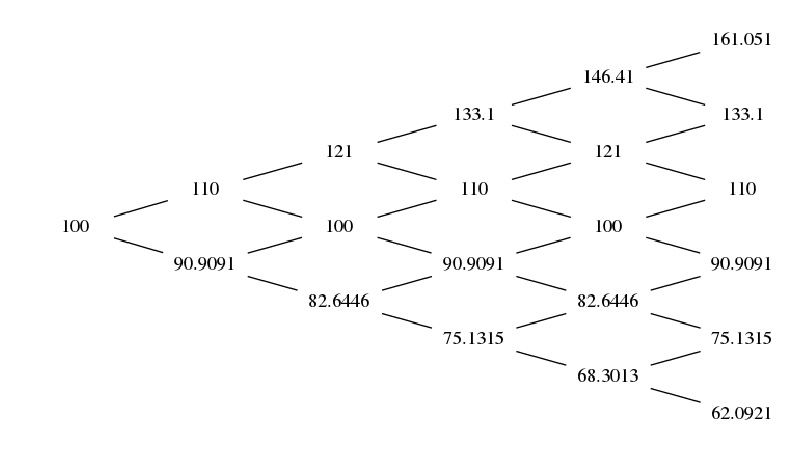

In [9]:
plt.figure(figsize=(16,8))
plt.axis('off')
plt.imshow( mpimg.imread(os.path.join(tmp, name+".png")) )

$0 < d < e^{r \Delta t} < u$

$u = e^{ \sigma \sqrt{ \Delta t } }$

$d = \frac{1}{u}$

$q = \frac{e^{r \Delta t} - d}{u - d}$ - вероятность движения вверх на каждом шаге

In [10]:
S = gen_lattice(S0=100., N=5, u=1.1, d=1/1.1)
######

L = lattice_levels(S)
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('------')
for i in range(len(S)-L, len(S) ):
    print(S[i])
    
print( '------\n\n')


k=len(S)-L-1 # last index before the last level starts
for i in reversed(range(1, L)):
    for j in range(0, i):
        print("%f connected to %f and %f" % (S[k], S[k+i], S[k+i+1]))
        k = k - 1
    print('---')

levels: 6 len: 21; number of first node on the last level: 15
------
161.05100000000004
133.10000000000002
110.00000000000003
90.9090909090909
75.13148009015777
62.092132305915506
------


68.301346 connected to 75.131480 and 62.092132
82.644628 connected to 90.909091 and 75.131480
100.000000 connected to 110.000000 and 90.909091
121.000000 connected to 133.100000 and 110.000000
146.410000 connected to 161.051000 and 133.100000
---
75.131480 connected to 82.644628 and 68.301346
90.909091 connected to 100.000000 and 82.644628
110.000000 connected to 121.000000 and 100.000000
133.100000 connected to 146.410000 and 121.000000
---
82.644628 connected to 90.909091 and 75.131480
100.000000 connected to 110.000000 and 90.909091
121.000000 connected to 133.100000 and 110.000000
---
90.909091 connected to 100.000000 and 82.644628
110.000000 connected to 121.000000 and 100.000000
---
100.000000 connected to 110.000000 and 90.909091
---


----------------

# Задача

In [9]:
import sys
print (sys.version)
#if sys.version_info >= (3,4):
#    print( "with enums" )

from enum import Enum
class CallPut(Enum):
    call = 1
    put = 2

class ExerciseStyle(Enum):
    euro = 1
    amer = 2


3.6.3 (v3.6.3:2c5fed8, Oct  3 2017, 18:11:49) [MSC v.1900 64 bit (AMD64)]


In [10]:
def pv_crr(amerEuro, callPut, S0, K, T, r, sigma, N):
    dt = T / N
    df = m.exp(-r * dt)

    u = m.exp(sigma * m.sqrt(dt))
    d = 1 / u
    p = ( m.exp(r * dt) - d ) / (u - d)

    S = gen_lattice(S0=S0, N=N, u=u, d=d)
    L = N+1 #lattice_levels(S)
    
    payoff = lambda x: max( 0, x - K ) if CallPut.call == callPut else max( 0, K - x)

    # Calculate payoff at the last lattice level
    ## TODO ##h

    # Go backwards, calculate extected value for prev node, based on known nodes
    # Calculate payoff at node k, based on expected value of S
    ## TODO ##
    
    return S[0], S

# parameters
S0 = 100.
T = 1.
r = 0.05
sigma = 0.20
K = 100.
N = 1000

es = ExerciseStyle.euro
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

es = ExerciseStyle.amer
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

100.0
100.0
100.0
100.0


-------